In [ ]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

# **1. PIZZE E PREDIZIONI**

---

Un nostro amico ha appena aperto una pizzeria e vuole capire in che modo ottimizzare l'impiego delle materie prime per le pizze da cuocere  durante la giornata.

Come prima richiesta, ci chiede che il nostro programma sia capace di dare una predizione di massima sul numero di pizze da fare durante la giornata.

Per la seconda richiesta, ci chiede di capire quando il bar di fronte organizza eventi, per regolarsi di conseguenza.

Di seguito i dati che ha raccolto personalmente in un centinaio di giornate lavorative.

- **prenotazioni:**le prenotazioni del giorno
- **pizze:** il numero di pizze cotte a fine giornata
- **eventi bar:** i giorni in cui il bar organizza eventi.

In [ ]:
#@title
df = pd.read_csv("https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_prenotazioni.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
display(df)

,prenotazioni,pizze,eventi bar
0,50,56,1
1,83,95,0
2,71,80,0
3,109,124,0
4,10,40,1
...,...,...,...
95,71,99,0
96,76,81,0
97,89,101,0
98,69,101,0


## **1.1 Analisi dei dati**

La prima richiesta è chiaramente un problema di predizione, mentre la seconda è un problema di classificazione.

Decidiamo di cominciare con la prima richiesta partendo dall'analisi dei dati a disposizione

In [ ]:
prenotazioni = df["prenotazioni"].to_numpy()
pizze        = df["pizze"].to_numpy()

medie_prenotazioni = np.mean(prenotazioni)
medie_pizze        = np.mean(pizze)

std_prenotazioni = np.std(prenotazioni)
std_pizze        = np.std(pizze)


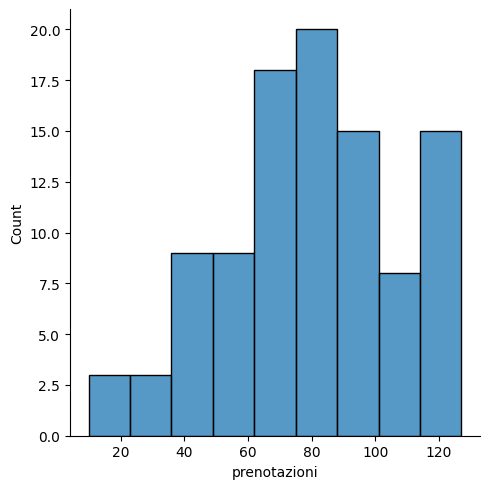

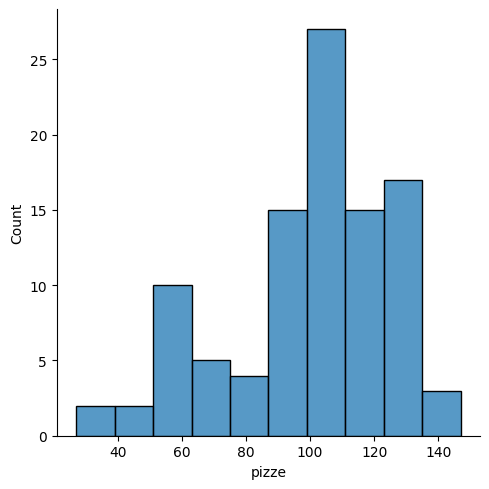

In [ ]:
import seaborn as sns

sns.displot(df["prenotazioni"])
sns.displot(df["pizze"])
plt.show()


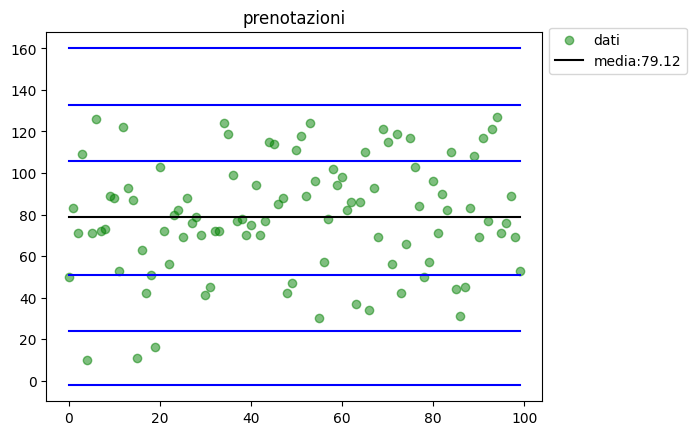

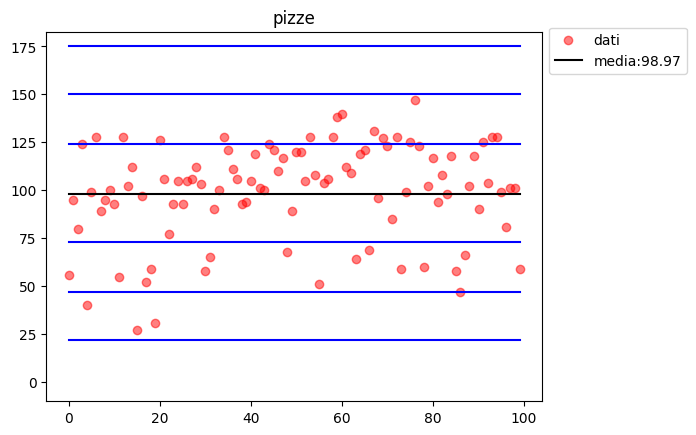

In [ ]:

def print_data(data: np.ndarray, media: float, std: float, color: str, titolo: str):
  x = np.arange(data.size)

  plt.scatter(x, data, color=color, alpha=0.5, label="dati")

  plt.plot(x, np.full_like(x, media + std * 3), color="blue")
  plt.plot(x, np.full_like(x, media + std * 2), color="blue")
  plt.plot(x, np.full_like(x, media + std), color="blue")
  plt.plot(x, np.full_like(x, media),       color="black", label="media:" + str(media))
  plt.plot(x, np.full_like(x, media - std), color="blue")
  plt.plot(x, np.full_like(x, media - std * 2), color="blue")
  plt.plot(x, np.full_like(x, media - std * 3), color="blue")

  plt.title(titolo)
  plt.legend(bbox_to_anchor=(1., 1.03))
  plt.ylim(-10)
  plt.show()


print_data(prenotazioni, medie_prenotazioni, std_prenotazioni, "green", "prenotazioni")
print_data(pizze,        medie_pizze,        std_pizze,        "red",   "pizze")

Da una prima analisi concludiamo che:
- i dati che abbiamo a disposizione sembrano avere una "forma" similie
- i dati sono contenuti all'interno delle tre, rispettive, deviazioni standard.

## **1.2 Correlazioni**

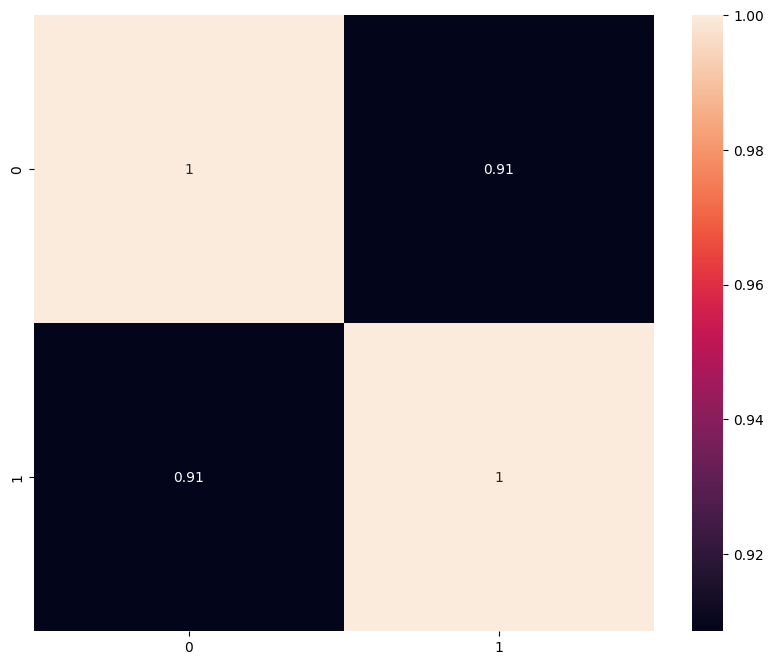

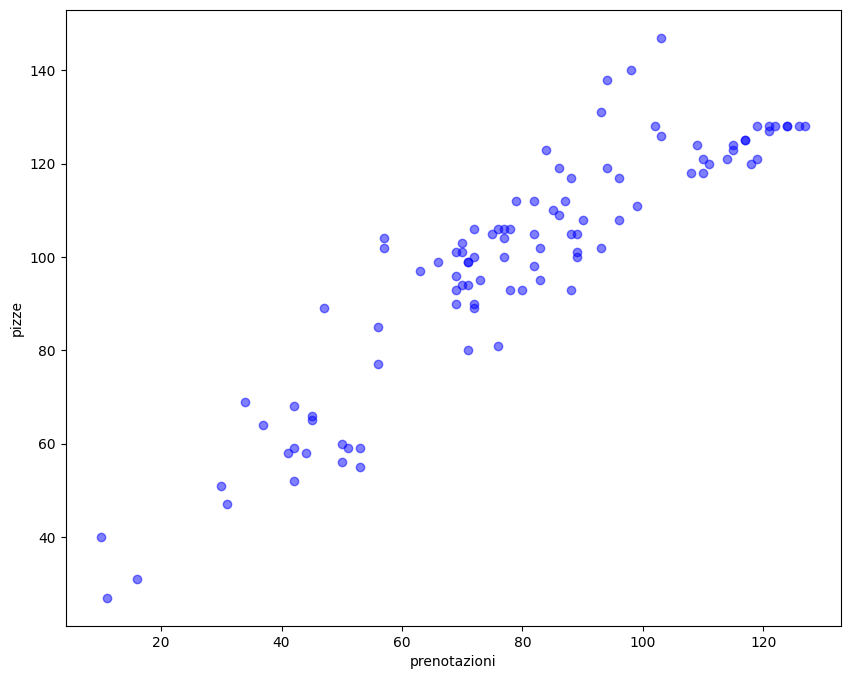

In [ ]:
#@title

plt.figure(figsize=(10, 8))
corr = np.corrcoef(prenotazioni, pizze)
sns.heatmap(corr, annot=True)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(prenotazioni, pizze, color="blue", alpha=0.5, label="datai")
plt.xlabel("prenotazioni")
plt.ylabel("pizze")
plt.show()

# **2. REGRESSIONE LINEARE**

Se tra due vairabili è riscontrabile  una qualche relazione di dipendenza, è possibile stabilire la predizione di un varabile in funzione del valore assunto dall'altra.

Il modello più semplide di relazione tra variabili è quello lineare, rappresentato da una retta la cui equazione é:

\begin{align}
  y = ax + b        
\end{align}
a = coefficiente angolare
\
b = interctta (bias)


Detto in altri termini: si può dire che quello della regressione lineare è un modello in cui la variabile attesa è data dalla combinazione delle *feature*.

In [ ]:

def linear_equation(x: np.ndarray, a: float, b: float) -> np.ndarray:
  y = (a * x) + b
  return y

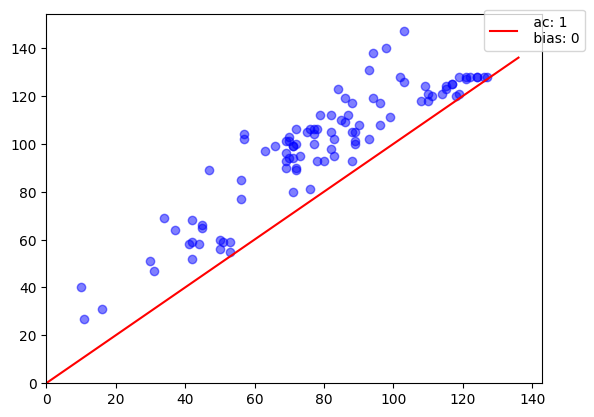

In [ ]:

def plot_linear_regression(ft: np.ndarray, lbs: np.ndarray, a:float, b: float):
  x = np.arange(np.max(ft + 10))
  y = linear_equation(x, a, b)

  labels = " ac: " + str(a)  + "\n bias: " + str(b)
  plt.plot(x, y, color="red", label=labels)
  plt.scatter(ft, lbs, color="blue", alpha=0.5)
  plt.xlim(0)
  plt.ylim(0)
  plt.legend()
  plt.legend(bbox_to_anchor=(1.1, 1.03))
  plt.show()


plot_linear_regression(prenotazioni, pizze, 1, 0)

## **2.1 Training**

Sostituiamo la "x" e la "y" nella nostra equazione di partenza con i nostri dati etichettati.

\begin{align}
  pizze = (a * prenotazioni) + b       
\end{align}


Trovato il modello matematico, va quindi cercato l'algoritmo  funzionale alla ricerca dei valori per i parametri "a" e "b".
Il risultato che cerchaimo di ottenere  è una sintesi in grado di rappresentare al meglio l'andamento dei dati.



## **2.2 Funzione obiettivo**


\
Un modo efficace di rileggere il nosto problema, è quello della ricerca dell'errore minimo che otteniamo ogni volta che testiamo una serie di valori per "a" e "b".

In matematica, un punto di partenza al nostro scopo lo fornisce la *funzione obiettivo* , chiamata anche *funzione di costo* o *funzione di perdita* (*loss function*).

In pratica si stratta di un metodo finalizzato alla mappatura di un evento attraverso l'errore che commettiamo ogni volta che confrontiamo valori attesi e valori osservati.








\

\begin{align}
        l = \dfrac{err_1^2 + err_2^2 + err_3^2 + ... + err_n^2}{n} = \dfrac{1}{n} \sum_{i=1}^n ((ax_i + b) - ŷ_i)^2  =  \dfrac{1}{n} \sum_{i=1}^n (y_i - ŷ_i)^2 = media(quadrato(errore(costo))))
\end{align}


\

Vedremo nel prossimo paragrafo, come sostanzialmente la fase di addestramento si basa sulla ***minimizazione della funzione di costo***. Dove per *minimizzare* si intende: trovare "a" e "b" in modo che questa funzione mi dia un valore  tendente il più possibile a zero.


In [ ]:
def loss(x: np.ndarray, y: np.ndarray, a: float, b: float):
  return np.average( (linear_equation(x, a, b) -  y) ** 2)


## **2.3 Primo tentativo di addestramento**


Proviamo ad iterare n volte aggiungendo o sottraendo un valore costante (**learning rate**), in modo da trovare i paramentri "a" e "b" che minimizzino al meglio la funzione di perdita.

In [ ]:
def train_1(x: np.ndarray, y: np.ndarray, it: int, lr: float):
  a = 0.
  b = 0.
  for i in range(it):
    crnt_loss = loss(x, y, a, b)

    if i % 10 == 0:
      print("iter={:d}    a={:.2f}    b={:.4f}    loss={:.5}".format(i, a, b, loss(x, y, a, b)))

    if   ( loss(x, y, a + lr,  b)      < crnt_loss ): a += lr
    elif ( loss(x, y, a - lr,  b)      < crnt_loss ): a -= lr
    elif ( loss(x, y, a,       b + lr) < crnt_loss ): b += lr
    elif ( loss(x, y, a,       b - lr) < crnt_loss ): b -= lr
    else: return a,b

  print("WARNING ")

a1, b1 = train_1(prenotazioni, pizze, it=10000, lr=0.1)




iter=0    a=0.00    b=0.0000    loss=1.0453e+04
iter=10    a=1.00    b=0.0000    loss=524.49
iter=20    a=1.20    b=0.8000    loss=213.65
iter=30    a=1.20    b=1.8000    loss=208.19
iter=40    a=1.20    b=2.8000    loss=204.74
iter=50    a=1.20    b=3.8000    loss=203.29


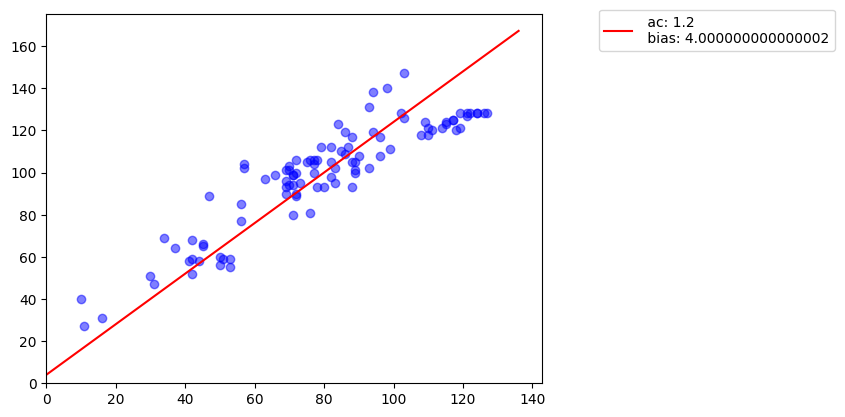

In [ ]:
plot_linear_regression(prenotazioni, pizze, a1, b1)


## **2.4 Primo tentativo di Predizione**

In [ ]:
#@title

# test predizione

i1 = np.random.randint(0, prenotazioni.size - 1)
i2 = np.random.randint(0, prenotazioni.size - 1)
i3 = np.random.randint(0, prenotazioni.size - 1)

t1 = [prenotazioni[i1], pizze[i1]]
t2 = [prenotazioni[i2], pizze[i2]]
t3 = [prenotazioni[i3], pizze[i3]]

p1 = a1 * t1[0] + b1
p2 = a1 * t2[0] + b1
p3 = a1 * t3[0] + b1

print("prenotazioni: %.f,  predizione: %.3f , atteso: %.f, errore: %.f" % (t1[0], p1, t1[1], abs(t1[1] - p1)))
print("prenotazioni: %.f,  predizione: %.3f , atteso: %.f, errore: %.f" % (t2[0], p2, t2[1], abs(t2[1] - p2)))
print("prenotazioni: %.f,  predizione: %.3f , atteso: %.f, errore: %.f" % (t3[0], p3, t3[1], abs(t3[1] - p3)))




prenotazioni: 34,  predizione: 44.800 , atteso: 69, errore: 24
prenotazioni: 51,  predizione: 65.200 , atteso: 59, errore: 6
prenotazioni: 70,  predizione: 88.000 , atteso: 101, errore: 13


# **3. DISCESA DEL GRADIENTE**

Visualizziamo la funzione di costo per studiarne la forma.

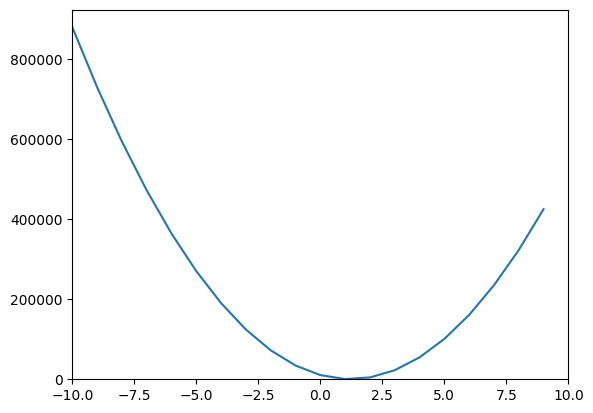

In [ ]:
la = np.arange(-10, 10)
ly = np.zeros_like(la)
for i in range(la.size):
  ly[i] = loss(prenotazioni, pizze, la[i], 0)

plt.plot(la, ly)
plt.ylim(0)
plt.xlim(-10,10)
plt.show()


## **3.1 Considerazioni sulla funzione di costo**

- La funzione di costo  è sempre continuna in ogni suo punto
- ha una forma regolare

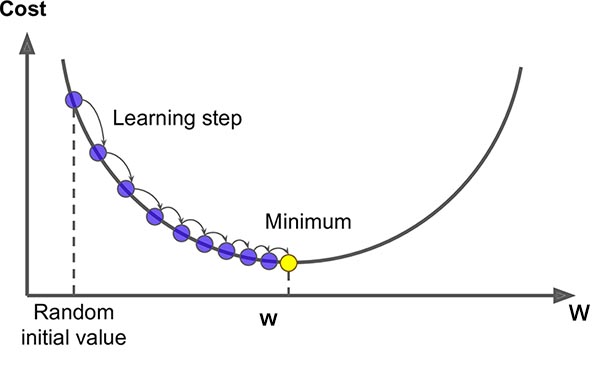

## **3.2 Il rapporto incrementale**


Cominciamo a ragionare partendo dal solo coefficiente angolare "a" e osserviamo cosa accade nella funzione di costo se fissiamo un intorno di un punto determinato da un valore di "a" a piacere.

\

Quidi, riassumendo in termini matematici la nostra funzione sarà:

\begin{align}
  f(a) = loss(a)
\end{align}

E l'intorno della nostra funzione rispetto ad un valore di "a" sarà dato da:

\begin{align}
  I(a) = (a - h, \ a, \ a + h)
\end{align}

Quindi da "a" a cui sommiamo una certa quantità "h"

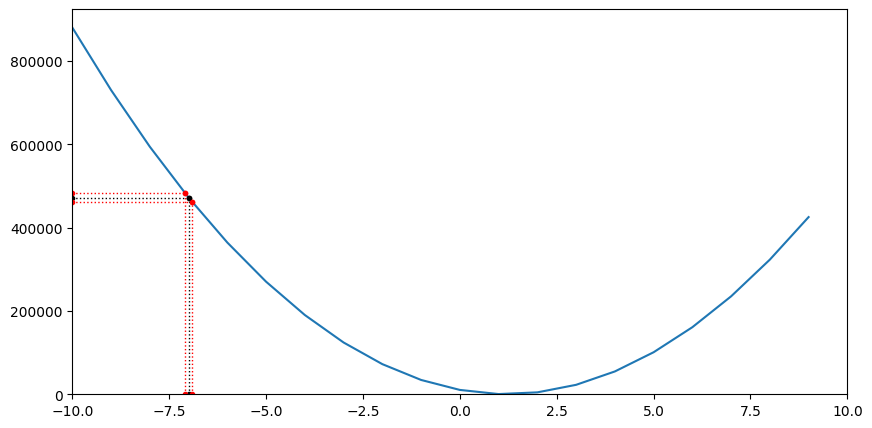

In [38]:
from matplotlib import animation
# =================
# da usare in Colab
# =================
from IPython.display import HTML



fig, ax = plt.subplots(figsize=(10, 5))



la = np.arange(-10, 10)
ly = np.zeros_like(la)
for p in range(la.size):
  ly[p] = loss(prenotazioni, pizze, la[p], 0)

line, = ax.plot(la, ly)



h = 0.2;
test_a_x = la[3]
test_a_x_1 = test_a_x - h
test_a_x_2 = test_a_x + h
test_a_y   = loss(prenotazioni, pizze, test_a_x,  0);
test_a_y_1 = loss(prenotazioni, pizze, test_a_x_1, 0)
test_a_y_2 = loss(prenotazioni, pizze, test_a_x_2, 0)




plot_a_v,   = ax.plot([-10, test_a_x],   [test_a_y,   test_a_y],   color = "black", marker = '.', ls = ':',  linewidth = '1.')
plot_a_1_v, = ax.plot([-10, test_a_x_1], [test_a_y_1, test_a_y_1], color= "red", marker = '.',  ls = ':', linewidth = '1.')
plot_a_2_v, = ax.plot([-10, test_a_x_2], [test_a_y_2, test_a_y_2], color="red", marker = '.',  ls = ':', linewidth = '1.')

plot_a_o,   = ax.plot([test_a_x, test_a_x],     [0,  test_a_y],   color = "black", marker = '.',ls = ':', linewidth = '1.')
plot_a_1_o, = ax.plot([test_a_x_1, test_a_x_1], [0,  test_a_y_1], color = "red",   marker = '.',ls = ':', linewidth = '1.')
plot_a_2_o, = ax.plot([test_a_x_2, test_a_x_2], [0,  test_a_y_2], color = "red",   marker = '.',ls = ':', linewidth = '1.')



def init():
  return plot_a_v, plot_a_1_v, plot_a_2_v,  plot_a_o, plot_a_1_o, plot_a_2_o




crnt_a_x = -10.
def animate(i):
  learning_rate = 0.5

  global crnt_a_x
  crnt_a_x += learning_rate
  a_x_1     = crnt_a_x - h
  a_x_2     = crnt_a_x + h

  a_y   = loss(prenotazioni, pizze, crnt_a_x,  0);
  a_y_1 = loss(prenotazioni, pizze, a_x_1, 0)
  a_y_2 = loss(prenotazioni, pizze, a_x_2, 0)

  plot_a_v.set_xdata([-10, crnt_a_x])
  plot_a_v.set_ydata([a_y,   a_y])
  plot_a_1_v.set_xdata([-10, a_x_1])
  plot_a_1_v.set_ydata([a_y_1, a_y_1])
  plot_a_2_v.set_xdata([-10, a_x_2])
  plot_a_2_v.set_ydata([a_y_2, a_y_2])


  plot_a_o.set_xdata([crnt_a_x, crnt_a_x])
  plot_a_o.set_ydata([0,  a_y])
  plot_a_1_o.set_xdata([a_x_1, a_x_1])
  plot_a_1_o.set_ydata([0,  a_y_1])
  plot_a_2_o.set_xdata([a_x_2, a_x_2])
  plot_a_2_o.set_ydata([0,  a_y_2])

  ax.set_title("delta x = %.2f   delta y = %.f" % (a_x_2 - crnt_a_x, a_y - a_y_2))
  return plot_a_v, plot_a_1_v, plot_a_2_v,  plot_a_o, plot_a_1_o, plot_a_2_o


anim = animation.FuncAnimation(fig,
                               animate,
                                np.arange(23),
                                init_func=init,
                                interval=500, blit=True)

plt.ylim(0)
plt.xlim(-10,10)
plt.show()


Osserviamo come al variare di "a", l'intorno costruito sull'asse delle ascisse determini un intorno sull'asse delle ordinate che va sempre più restringendosi tendendo a zero con l'avvicinarsi al valore minimo della funzione.

Nel grafico si ha:

- **delta x**: definisce lo spazio qullo che viene chiamato l'intorno destro rispetto ad "a" sulle ascisse.
\begin{align}
  \delta_{x+} = (a + h) - a
\end{align}

- **delta y**: definisce lo spazio a destra di f(a) sulle oridnate.
\begin{align}
  \delta_{y+} =  f(a + h) - f(a)
\end{align}





In [39]:
# Funzione per avviare l'animazione
HTML(anim.to_jshtml())

Arrivati a questo punto, possiamo dire di aver trovato un modo che ci permette finalmente di ceracare in modo veloce e corretto quei parametri che inseriti nell'equazione lineare e rapportati alla funzione di costo, ***minimizzano** l'errore di predizione.

Il prossimo passo è formazlizzare questa relazione attraverso il **rapporto incrementale**, cioè il rapporto tra l'incremento sull'asse delle ascisse e l'incremento sulle ordinate.
\begin{align}
  \frac{\Delta y}{\Delta a} = \frac{f(a + h) - f(a)}{(a + h) - a} = \frac{f(a + h) - f(a)}{h}
\end{align}



## **3.3 La derivata**




In matematica la derivata è la valutazione del rapporto incrementale al tendere a 0 dell'incremento.

Formalmente abbiamo:
\begin{align}
  f'(a) = \lim_{h\to 0}	 \frac{f(a + h) - f(a)}{h}
\end{align}

Riprendendo il notebook *statistica_descrittiva_1*, potremmo osservare come la derivata nono sia altro che il tasso di variazione di una funzione in un determinato punto.







Dovendo implementare tutto via codice, possiamo anche eliminare il limite e approssimarlo fornendo un valore molto piccolo dell' incremento h

\

\begin{align}
f'(a)= \frac{f(x + 0.001) - f(x)}{0.001}
\end{align}

## **3.4 Il gradiente**

Tralasciando il calcolo delle derivate passiamo direttamente alla formulazione della derivata della funzione di costo, che sarà la base della nuova funzione per "minimizzare" la distanza tra il nostro modello di ml e la sua etichetta.


Nel nostro caso, la nostra equazione dipende da due variabili "a" e "b".
In questo caso si parla di **derivate parziali** il cui risultato viene definito appunto **gradiente**.


\begin{align}
   \frac{\partial l}{\partial a}= \frac{2}{n}  \sum_{i=1}^n x_i((ax_i + b) - ŷ_i)
\end{align}


\begin{align}
   \frac{\partial l}{\partial b}= \frac{2}{n}  \sum_{i=1}^n ((ax_i + b) - ŷ_i)
\end{align}



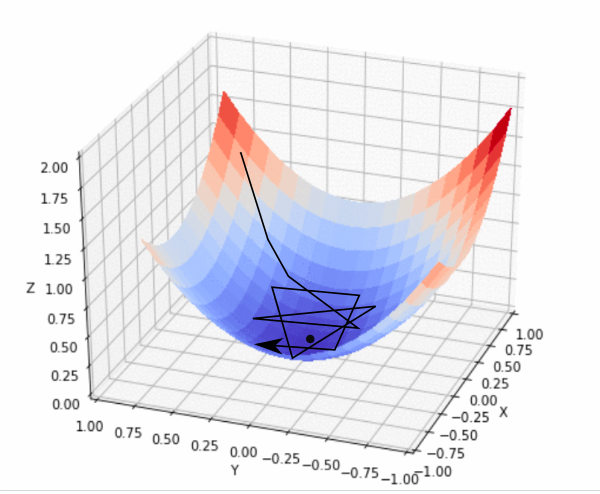

In [ ]:
def gradient(x: np.ndarray, y: np.ndarray, a: float, b: float):
  loss = ((x * a) + b) - y
  da = 2 * np.average( x * loss)
  db = 2 * np.average(loss)
  return da, db

## **3.4 Addestramento**

In questo nuovo modello di addestramento resta l'approccio basato su una singola iterazione e chiameremo d'ora in poi l'iperparametro che determina il numero di iterazioni: ***epoche***.

La discesa del gradiente rende stabile la minimizzazione degli errori, mentre il valore di **learning rate** tende ad assumere un ruolo molto più determinante nella riuscita del modello.
Essendo quest'ultimo, l' iperparametro  che determina la dimensione dei passi che il modello dovrà compiere nella direzione del processo di minimizzazione, avremo che:

 - un learning rate troppo alto può portare a una convergenza instabile o a saltare il minimo globale
 - un learning rate troppo basso può rendere il processo di convergenza troppo lento, richiedendo molte epoche per raggiungere un buon risultato.



In [40]:
def linear_regression_train(x: np.ndarray, y: np.ndarray, epoch: int, lr: float):
  a = b = 0.0
  for i in range(epoch):
    da, db = gradient(x, y, a, b)
    a -= da * lr
    b -= db * lr
    # Log
    if i % 10 == 0:
      print("iter={:d}    a={:.2f}    b={:.4f}    loss={:.2}".format(i, a, b, loss(x, y, a, b)))
  return a, b

## **3.5 Predizione**

Una volta ottenuti i valori corretti di a e b in grado di rappresentare correttamente il modello di regressione, possiamo riutilizzarli per ottenere le previsioni dell'andamento di nuovi dati.

In [ ]:


a, b = linear_regression_train(prenotazioni, pizze, 10000, 0.0001)


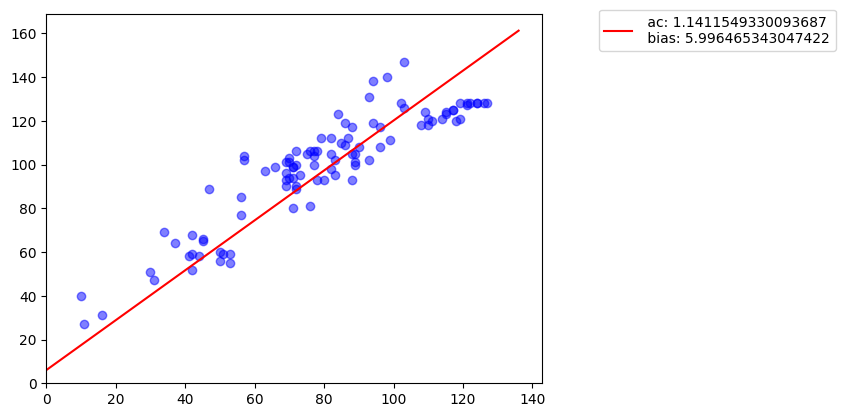

In [ ]:
plot_linear_regression(prenotazioni, pizze, a, b)

In [ ]:


p1 = (a * t1[0]) + b
p2 = (a * t2[0]) + b
p3 = (a * t3[0]) + b


print("prenotazioni: %.f,  predizione: %.3f , atteso: %.f, errore: %.f" % (t1[0], p1, t1[1], abs(t1[1] - p1)))
print("prenotazioni: %.f,  predizione: %.3f , atteso: %.f, errore: %.f" % (t2[0], p2, t2[1], abs(t2[1] - p2)))
print("prenotazioni: %.f,  predizione: %.3f , atteso: %.f, errore: %.f" % (t3[0], p3, t3[1], abs(t3[1] - p3)))




prenotazioni: 34,  predizione: 44.796 , atteso: 69, errore: 24
prenotazioni: 51,  predizione: 64.195 , atteso: 59, errore: 5
prenotazioni: 70,  predizione: 85.877 , atteso: 101, errore: 15




---



# **4. LA LIBRERIA SCIKIT-LEARN**


---



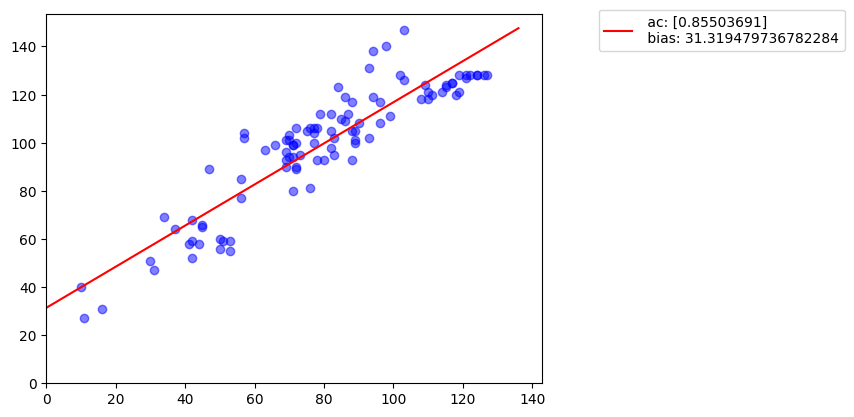

In [ ]:
from sklearn.linear_model import LinearRegression


# ADDESTRAMENTO

# instansizamento della class LinearRegression
lr = LinearRegression()

# fit(x,y) avvia la classe di training
#  scikit-learn richiede che i dati delle features (x)
#  siano disposti in colonna.
# in numpy per convertire un array in una matrice 1xN si usa
# la funzione reshape(-1,1)
lr.fit( prenotazioni.reshape(-1,1), pizze)


a = lr.coef_
b = lr.intercept_
plot_linear_regression(prenotazioni, pizze, a, b)


## **4.1 Training, Validation, Test**

Di norma un set di dati viene suddiviso al più in tre blocchi.

- **Training set**: il set di dati usato in fase di addestramento.
- **Validation set**: il set utilizzato per valutare il modello mentre si regolano gli iperparametri del modello scelto.
- **Test set**: il set usato per la valutazione finale della fase di training.

Facciamo una prima prova senza intervenire ulteriormente nel dataset, basandoci esclusivamente sulla divisione tra ***training set*** e ***test set***.

***train_test_split*** è il modulo di ***scikit-learn*** per lo split dei dati.

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(prenotazioni.reshape(-1, 1), pizze, test_size=0.2)


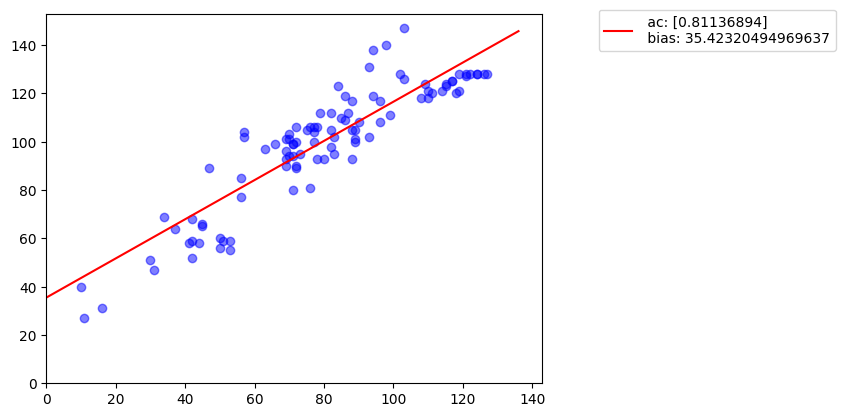

In [ ]:

lr.fit(x_train, y_train)

a = lr.coef_
b = lr.intercept_
plot_linear_regression(prenotazioni, pizze, a, b)


Mescolare i set di dati di training, può risultar utile ad avere più uniformità nella divisione dedi dati tra **training set** e **test set**

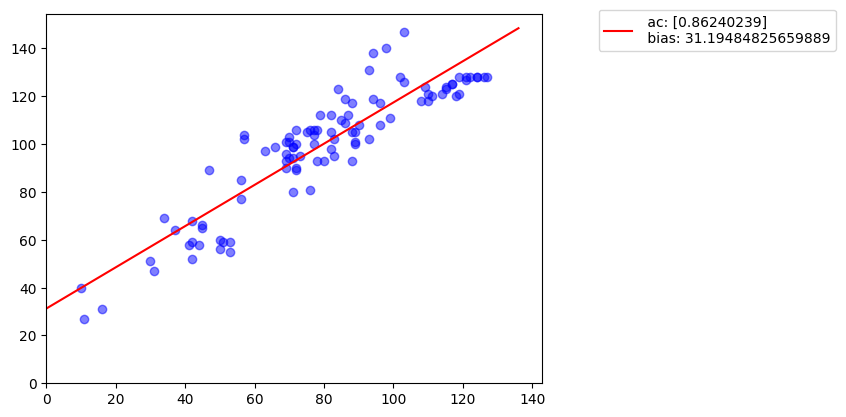

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(prenotazioni.reshape(-1, 1), pizze, test_size=0.2, shuffle=True)



lr.fit(x_train, y_train)

a = lr.coef_
b = lr.intercept_
plot_linear_regression(prenotazioni, pizze, a, b)

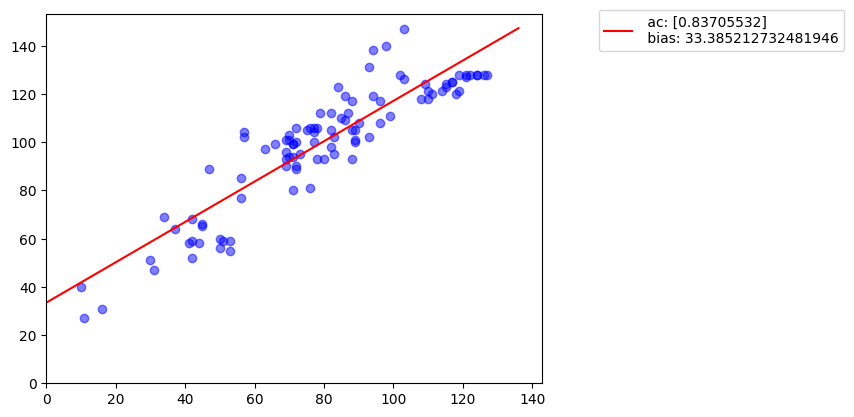

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(prenotazioni.reshape(-1, 1), pizze, test_size=0.2,  shuffle=True, random_state=42)



lr.fit(x_train, y_train)

a = lr.coef_
b = lr.intercept_
plot_linear_regression(prenotazioni, pizze, a, b)

## **4.2 Come valutare un modello**


Una delle misure che descrive meglio l'errore di approssimazione commeso dal nostro modelo è la *radice dell'errore quadratico medio*.
Questa non è altro che la deviazione standard delle distanze (errori) tra valore predetto e valore atteso.



\begin{align}
      RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - ŷ_i)^2}
\end{align}

In [ ]:
from sklearn.metrics import mean_squared_error

pred_1 = lr.predict(x_test)

mse_test_1 = mean_squared_error(y_test, pred_1)
rmse_test_1 = np.sqrt(mse_test_1)

print(pizze.max(), pizze.min())
print(f"STIMA DELL'ERRORE MEDIO NELLA PREDIZIONE DELLE ETICHETTE: {rmse_test_1}")

147 27
STIMA DELL'ERRORE MEDIO NELLA PREDIZIONE DELLE ETICHETTE: 11.331100575115133


**punteggio R2**


Indica la percentuale di varianza che hanno in comune due variabili.

In [ ]:
from sklearn.metrics import r2_score

r2_tst_1 = r2_score(y_test, pred_1)
print(f"LE ETICHETTE PREDETTE E DI TEST HANNO LA STESSA VARIANZA ALL' {r2_tst_1 * 100:.3f}%")

LE ETICHETTE PREDETTE E DI TEST HANNO LA STESSA VARIANZA ALL' 85.926%


# 5. BIAS NELL' APPRENDIMENTO

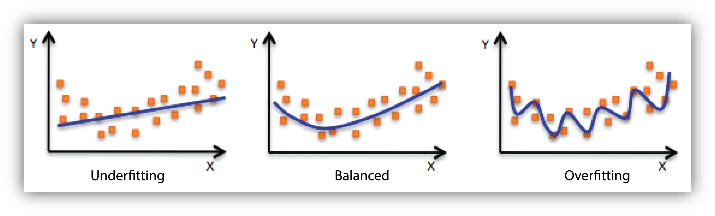

Nel contesto del machine learning, l'underfitting e l'overfitting sono problemi comuni che possono compromettere le prestazioni di un modello.

- **Underfitting**
L'underfitting si verifica quando un modello è troppo semplice per catturare le relazioni sottostanti nei dati. Questo succede spesso quando il modello ha una capacità troppo bassa, cioè non ha abbastanza parametri o la sua complessità è troppo limitata. Di conseguenza, il modello non riesce a rappresentare adeguatamente i dati di addestramento né a generalizzare sui dati di test, portando a una scarsa accuratezza sia sui dati di training che sui dati di validation.

- **Overfitting**
L'overfitting, al contrario, avviene quando un modello è troppo complesso e si adatta eccessivamente ai dati di addestramento, catturando anche il rumore e le peculiarità non rilevanti. Questo porta a prestazioni eccellenti sui dati di training, ma a una scarsa capacità di generalizzazione sui dati di test, dove il modello tende a performare male. L'overfitting è spesso causato da un modello con troppi parametri, una complessità eccessiva o un training troppo prolungato senza adeguate tecniche di regolarizzazione.

Detto in poche parole: un buon modello deve apprendere come generalizzare i dati attraverso i pattern che li descrivono.


### **5.1 Scaling**

Un passo importante per prevenire bias di apprendimento, consiste nello scalare i valori di un dataset in modo da ridurre le differenze dovute alle diverse unità di misura.

Inoltre la maggior parte dei modelli di ML lavora meglio con insiemi di valori delimitati in un range preciso e limitato.

Le principali metodologie di scaling sono:
**normalizzazione** e **standardizzazione**


### 5.2 Normalizzazione
\begin{align}
  z = \frac{x - x_{min}}{ x_{max} - x_{min}}
\end{align}


Scala i valori in un rage che va da 0 a 1.
La distribuzione resta inalterata, il rapporto interno tra le variabili non cambia, cambia, appunto, solo la scala con ui sono espresse.


In [ ]:
from sklearn.preprocessing import MinMaxScaler


scale_mm = MinMaxScaler()
prenotazioni_mm_scaled = scale_mm.fit_transform( prenotazioni.reshape(-1,1))
pizze_mm_scaled        = scale_mm.fit_transform(pizze.reshape(-1, 1)).flatten()



**Inversa della normalizzazione**

In [ ]:
def reverse_scale_min_max(z):
  x_min = np.min(prenotazioni)
  y_max = np.max(prenotazioni)
  return (z * (y_max - x_min)) + x_min



**SPLIT**

In [ ]:
x_train_mm, x_test_mm, y_train_mm, y_test_mm = train_test_split(prenotazioni_mm_scaled,
                                                                pizze_mm_scaled,
                                                                test_size=0.2)


**TRAINING**

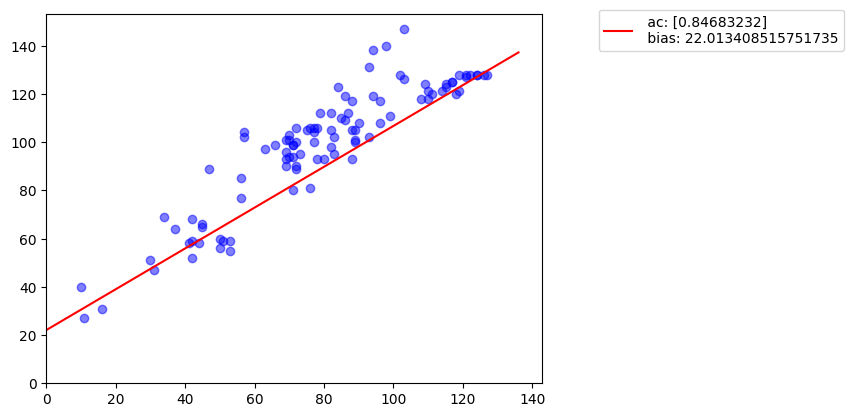

In [ ]:
lr.fit(x_train_mm, y_train_mm)

a = lr.coef_
b = reverse_scale_min_max(lr.intercept_)
plot_linear_regression(prenotazioni, pizze, a, b)


**TEST**

In [ ]:

# RMSE
pred_mm = lr.predict(x_test_mm)

mse_test_mm = mean_squared_error(y_test_mm, pred_mm)
rmse_test_mm = np.sqrt(mse_test_mm)

print(pizze.max(), pizze.min())
print(f"STIMA DELL'ERRORE MEDIO NELLA PREDIZIONE DELLE ETICHETTE: {rmse_test_mm}")



# R2
r2_tst_mm = r2_score(y_test_mm, pred_mm)
print(f"LE ETICHETTE PREDETTE E DI TEST HANNO LA STESSA VARIANZA AL : {r2_tst_mm * 100:.3f}%")

147 27
STIMA DELL'ERRORE MEDIO NELLA PREDIZIONE DELLE ETICHETTE: 0.07944168565351517
LE ETICHETTE PREDETTE E DI TEST HANNO LA STESSA VARIANZA AL : 83.015%


### 5.3  Standardizzazione

Per effettuare la standardizzazione basterà sostituire ogni variabile con il rispettivo z-score.

\begin{align}
  z = \frac{x - \mu}{\sigma}
\end{align}

È molto utile quando una distribuzione ha una forma "Gaussiana" è può essere sostituita con una rappresentazione più semplice.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()

prenotazioni_std_scaled = scaler_std.fit_transform( prenotazioni.reshape(-1,1))
